In [82]:
# What libraries are required for this project,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "imdb_movies.csv"  

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nBasic Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())


Dataset Shape: (10052, 12)

Column Names:
 Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

Basic Info:

<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10052 non-null  object        
 1   date_x      10052 non-null  datetime64[ns]
 2   score       10052 non-null  float64       
 3   genre       10052 non-null  object        
 4   overview    10052 non-null  object        
 5   crew        10052 non-null  object        
 6   orig_title  10052 non-null  object        
 7   status      10052 non-null  object        
 8   orig_lang   10052 non-null  object        
 9   budget_x    10052 non-null  float64       
 10  revenue     10052 non-null  float64       
 11  country     10052 non-null  object        
dt

In [78]:
#  2.Data Overview and Basic Exploration

# Display basic info about the dataset
print(" Dataset Overview:")
print(df.info())  # Shows data types and missing values

print("\n Summary Statistics of Numerical Columns:")
print(df.describe())  # Provides mean, median, min, max, etc.

# Checking for missing values in each column
print("\n Missing Values Count:")
print(df.isnull().sum())


 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
None

 Summary Statistics of Numerical Columns:
              score      budget_x       revenue
count  10178.000000  1.017800e+04  1.017800e+04
mean      63.497052  6.488238e+07  2.531401e+08
std       13.537012  5.707565e+07  2.777880e+08
min 

In [80]:
#   3. Data Cleaning

# 1️ Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2️ Handling Missing Values
# Drop rows where 'genre' or 'crew' is missing (important categorical data)
df = df.dropna(subset=['genre', 'crew'])

# Fill missing numerical values with median
df['budget_x'].fillna(df['budget_x'].median(), inplace=True)
df['revenue'].fillna(df['revenue'].median(), inplace=True)

# Convert Data Types
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')  # Convert to datetime
df['score'] = pd.to_numeric(df['score'], errors='coerce')     # Ensure numeric type

# Check for duplicates
df = df.drop_duplicates()

#  Display cleaned data info
print("\nCleaned Data Info:\n")
print(df.info())

# Save cleaned dataset (optional)
df.to_csv("imdb_movies_cleaned.csv", index=False)


Missing Values:
 names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10052 non-null  object        
 1   date_x      10052 non-null  datetime64[ns]
 2   score       10052 non-null  float64       
 3   genre       10052 non-null  object        
 4   overview    10052 non-null  object        
 5   crew        10052 non-null  object        
 6   orig_title  10052 non-null  object        
 7   status      10052 non-null  object        
 8   orig_lang   10052 non-null  object        
 9   budget_x    10052 non-null  float64       
 10  revenue     10052 non-null  float64       
 11  country     10052 non-nu

C:\Users\Poornima\AppData\Local\Temp\ipykernel_17768\91977592.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget_x'].fillna(df['budget_x'].median(), inplace=True)
C:\Users\Poornima\AppData\Local\Temp\ipykernel_17768\91977592.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 


Runtime column not found in the dataset.


C:\Users\Poornima\AppData\Local\Temp\ipykernel_17768\3549859708.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")


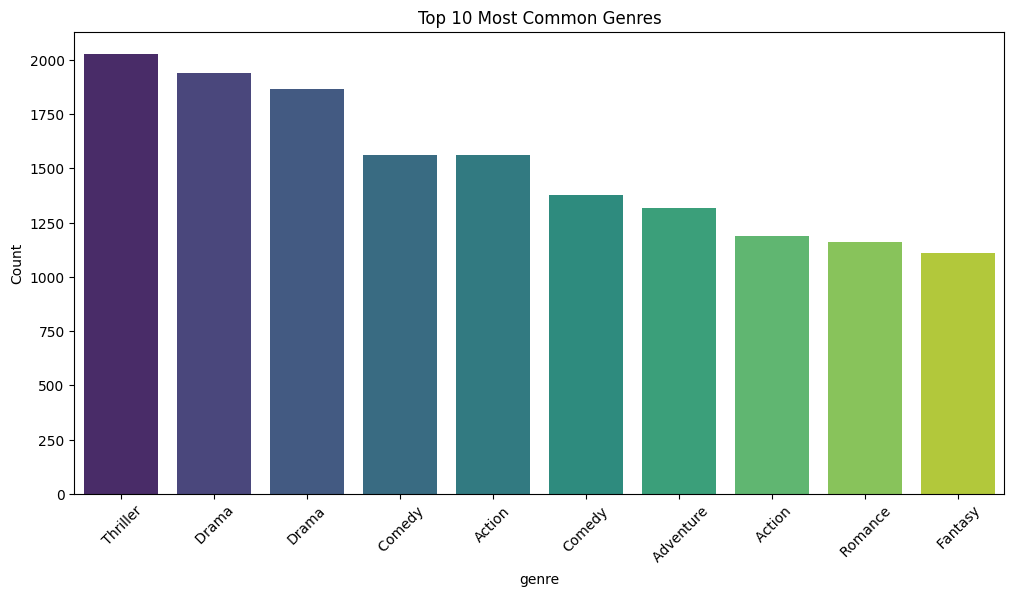

In [57]:
# 4.Univariate Analysis: Explore each column individually.

#What is the distribution of movie runtimes? Plot a histogram and describe its shape.

# Histogram for Movie Runtimes
if "runtime" in df_cleaned.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_cleaned["runtime"], bins=30, kde=True, color="skyblue")
    plt.title("Distribution of Movie Runtimes")
    plt.xlabel("Runtime (minutes)")
    plt.ylabel("Count")
    plt.show()
else:
    print("\nRuntime column not found in the dataset.")

    
#  What are the most common genres in the dataset? Use a bar chart to show their distribution.
#  Bar Chart for Most Common Genres
if "genre" in df_cleaned.columns:
    genre_counts = df_cleaned["genre"].str.split(",").explode().value_counts()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")
    plt.title("Top 10 Most Common Genres")
    plt.xlabel("genre")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nGenre column not found in the dataset.")



Runtime or Score column not found in the dataset.


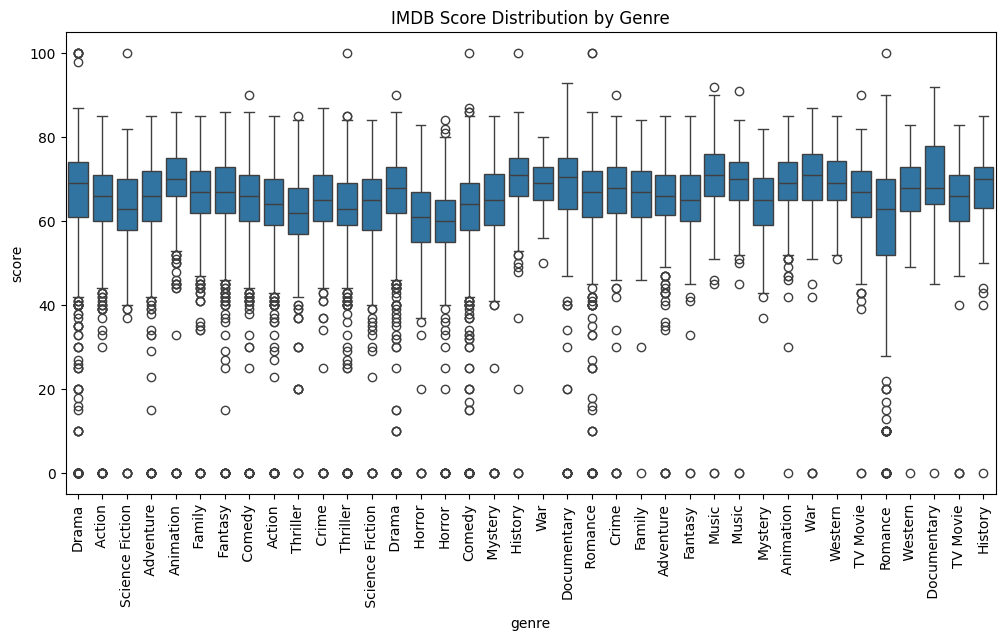

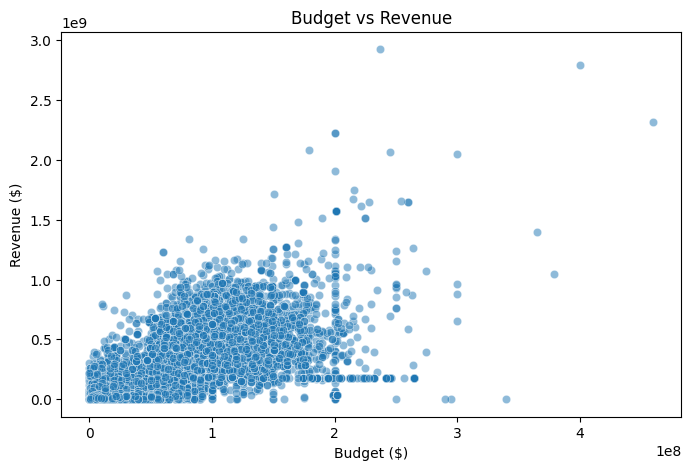

Correlation between Budget and Revenue: 0.68


In [58]:
#5. Bivariate Analysis: Explore relationships between two variables.

#Is there a relationship between a movie’s runtime and its rating?
#Plot a scatter plot and describe any observed trend.

# Scatter Plot: Runtime vs Rating
if "runtime" in df_cleaned.columns and "score" in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_cleaned["runtime"], y=df_cleaned["score"], alpha=0.5)
    plt.title("Runtime vs Rating")
    plt.xlabel("Runtime (minutes)")
    plt.ylabel("IMDB Score")
    plt.show()
else:
    print("\nRuntime or Score column not found in the dataset.")
    
#How do ratings vary by genre? Use a boxplot to visualize the differences in ratings across genres.

# Boxplot: Ratings by Genre
if "genre" in df_cleaned.columns and "score" in df_cleaned.columns:
    df_exploded = df_cleaned.assign(genre=df_cleaned["genre"].str.split(",")).explode("genre")
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="genre", y="score", data=df_exploded)
    plt.xticks(rotation=90)
    plt.title("IMDB Score Distribution by Genre")
    plt.show()
else:
    print("\nGenre or Score column not found in the dataset.")

#Is there a correlation between the number of votes a budget and revenue? Create a scatter plot and calculate the correlation coefficient. 
#What can you conclude?

# Scatter Plot: Budget vs Revenue + Correlation
if "budget_x" in df_cleaned.columns and "revenue" in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_cleaned["budget_x"], y=df_cleaned["revenue"], alpha=0.5)
    plt.title("Budget vs Revenue")
    plt.xlabel("Budget ($)")
    plt.ylabel("Revenue ($)")
    plt.show()

    correlation_budget_revenue = df_cleaned["budget_x"].corr(df_cleaned["revenue"])
    print(f"Correlation between Budget and Revenue: {correlation_budget_revenue:.2f}")
else:
    print("\nBudget_x or Revenue column not found in the dataset.")


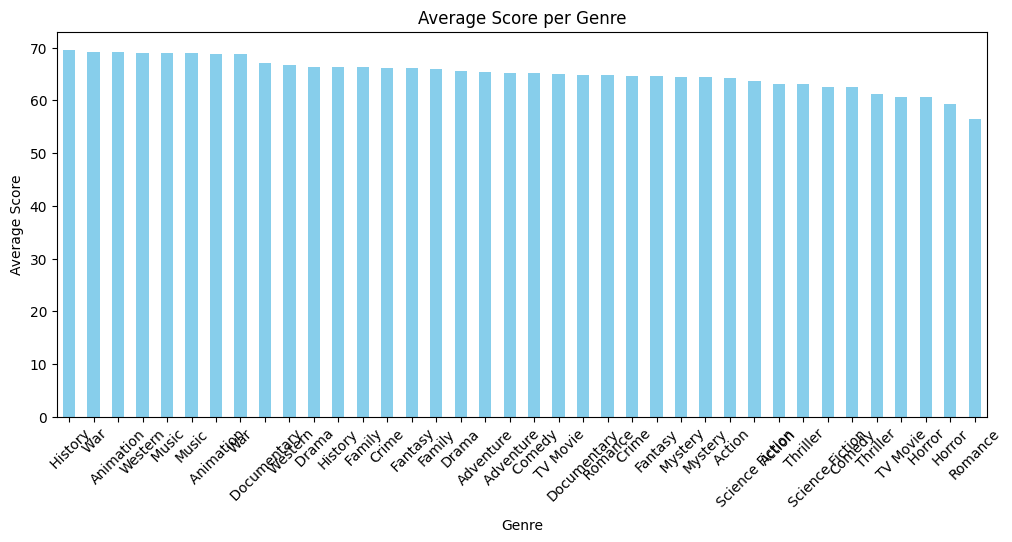

<Figure size 1200x600 with 0 Axes>

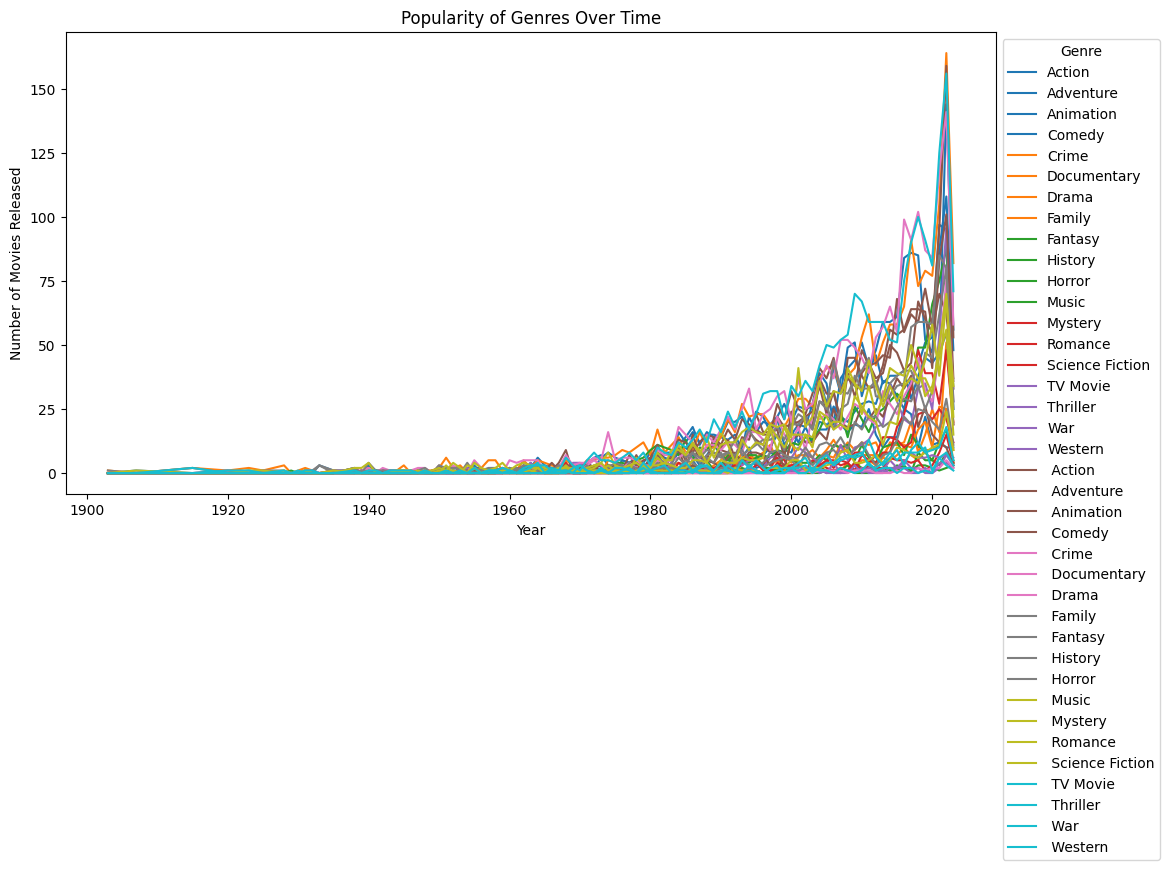

In [59]:
#    6.Genre-Specific Analysis


#Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.

# Average Rating per Genre
if "genre" in df_cleaned.columns and "score" in df_cleaned.columns:
    df_exploded = df_cleaned.assign(genre=df_cleaned["genre"].str.split(",")).explode("genre")
    avg_score_per_genre = df_exploded.groupby("genre")["score"].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 5))
    avg_score_per_genre.plot(kind="bar", color="skyblue")
    plt.title("Average Score per Genre")
    plt.xlabel("Genre")
    plt.ylabel("Average Score")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nGenre or Score column not found in the dataset.")

#How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

# Genre Popularity Over Time
if "genre" in df_cleaned.columns and "date_x" in df_cleaned.columns:
    genre_trend = df_exploded.groupby(["date_x", "genre"]).size().unstack().fillna(0)

    plt.figure(figsize=(12, 6))
    genre_trend.plot(kind="line", figsize=(12, 6), colormap="tab10")
    plt.title("Popularity of Genres Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Movies Released")
    plt.legend(title="Genre", bbox_to_anchor=(1, 1))
    plt.show()
else:
    print("\nDate_x or Genre column not found in the dataset.")


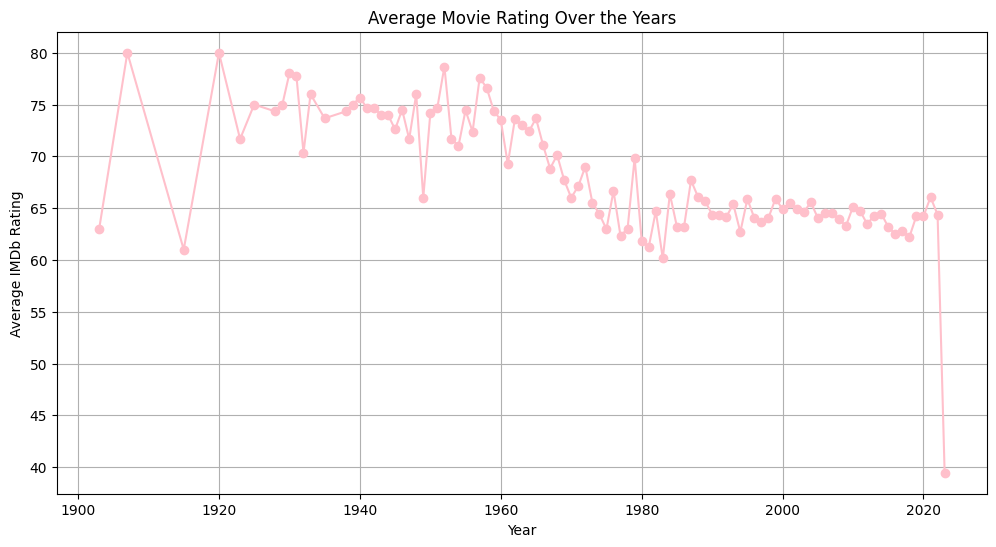

In [74]:
# 7. Year and Trend Analysis

#How has the average movie rating changed over the years? Plot the average rating for each year.

# Convert 'date_x' (release date) to datetime and extract year
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')
df['Year'] = df['date_x'].dt.year

# Group by year and calculate the average rating (score)
avg_ratings_per_year = df.groupby('Year')['score'].mean()

# Plot the trend of average ratings over the years
plt.figure(figsize=(12, 6))
plt.plot(avg_ratings_per_year.index, avg_ratings_per_year.values, marker='o', linestyle='-', color='pink')
plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.title("Average Movie Rating Over the Years")
plt.grid(True)
plt.show()


📌 Year with highest movie releases: 2022 (954 movies)
📌 Year with lowest movie releases: 1903 (1 movies)


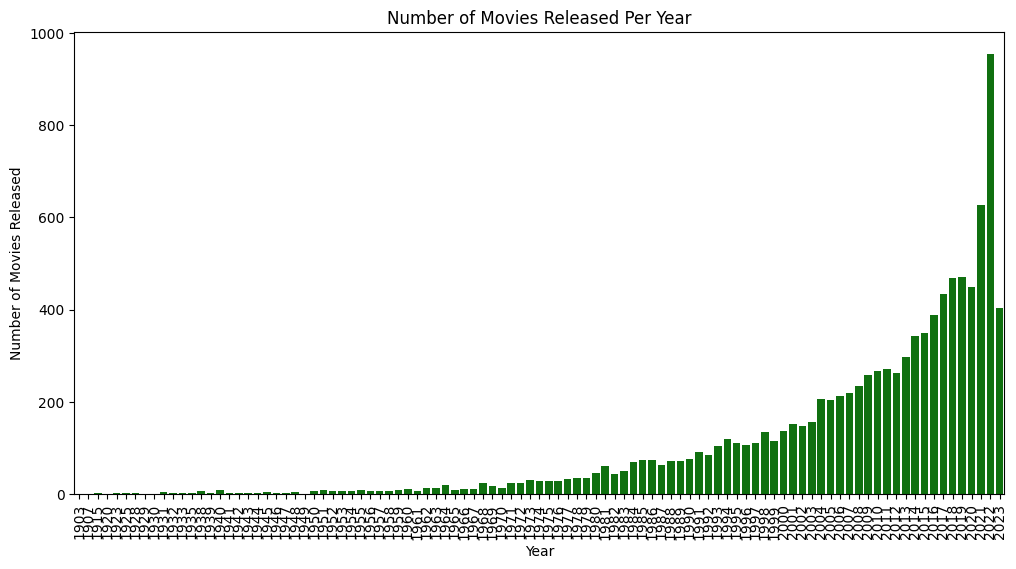

In [69]:
#Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.
# Convert 'date_x' column to datetime format
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

# Extract the year from 'date_x'
df['Year'] = df['date_x'].dt.year

# Drop rows where 'Year' is missing
df = df.dropna(subset=['Year'])

# Convert Year to integer
df['Year'] = df['Year'].astype(int)

# Count number of movies per year
movies_per_year = df['Year'].value_counts().sort_index()

# Find the years with highest and lowest movie releases
highest_year = movies_per_year.idxmax()
lowest_year = movies_per_year.idxmin()

print(f"📌 Year with highest movie releases: {highest_year} ({movies_per_year.max()} movies)")
print(f"📌 Year with lowest movie releases: {lowest_year} ({movies_per_year.min()} movies)")

# Plot the number of movies released per year
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color='green')
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released Per Year")
plt.xticks(rotation=90)
plt.show()


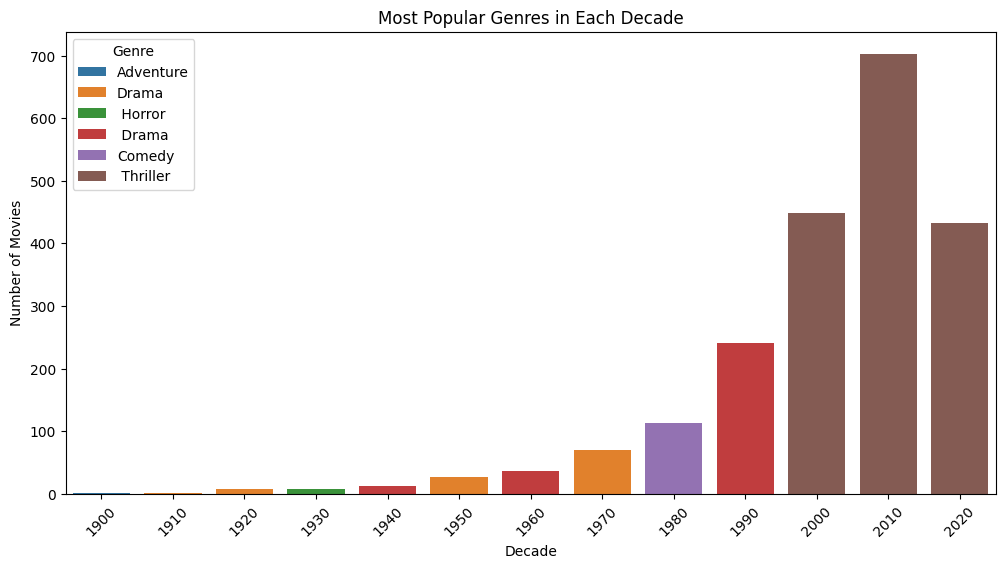

In [84]:
#Multivariate Analysis: Analyze multiple variables together.


# 8.Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

# Convert 'date_x' to datetime and extract the decade
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')
df['Decade'] = (df['date_x'].dt.year // 10) * 10  # Group by decades

# Drop rows with missing genre or decade
df = df.dropna(subset=['genre', 'Decade'])

# Split multiple genres (assuming genres are separated by commas)
df_exploded = df.assign(genre=df['genre'].str.split(',')).explode('genre')

# Count movies per genre in each decade
genre_decade_counts = df_exploded.groupby(['Decade', 'genre']).size().reset_index(name='count')

# Get the most popular genre in each decade
top_genres_per_decade = genre_decade_counts.loc[genre_decade_counts.groupby('Decade')['count'].idxmax()]

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_per_decade, x="Decade", y="count", hue="genre", dodge=False)
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Most Popular Genres in Each Decade")
plt.xticks(rotation=45)
plt.legend(title="Genre")
plt.show()


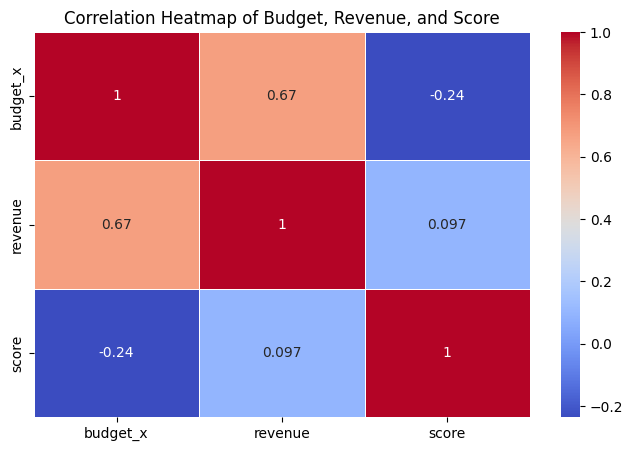

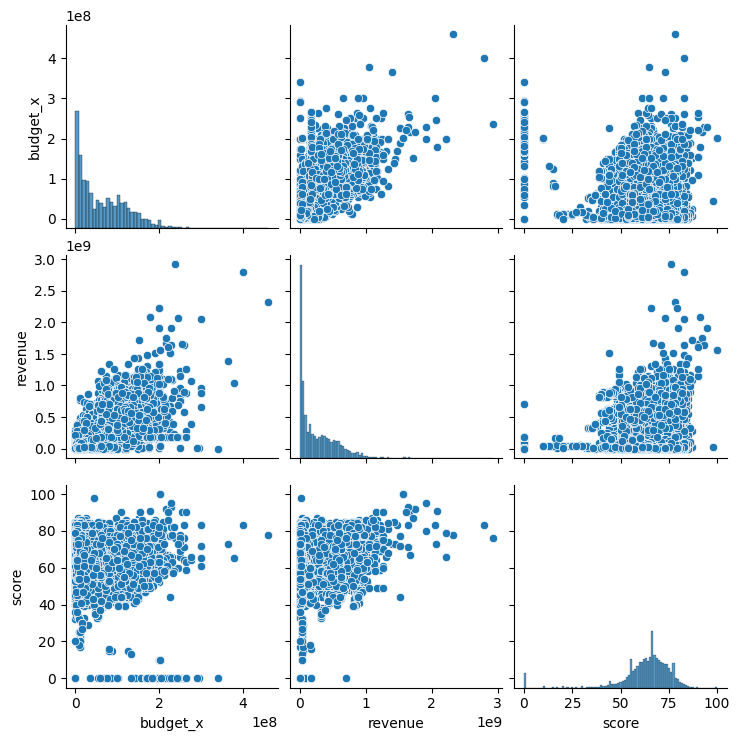

In [76]:
#Plot a heatmap or pairplot to examine relationships between budget, revenue, scores.
# Select relevant columns
df_numeric = df[['budget_x', 'revenue', 'score']].dropna()

# Plot Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Budget, Revenue, and Score")
plt.show()

# Plot Pairplot
sns.pairplot(df_numeric)
plt.show()

    Year                           genre  score
0   1903                  Drama, History   63.0
1   1907      Adventure, Science Fiction   80.0
2   1915             Drama, History, War   61.0
3   1920  Drama, Horror, Thriller, Crime   80.0
4   1923       Comedy, Romance, Thriller   79.0
7   1925                  Drama, History   76.0
9   1928          Drama, Science Fiction   82.0
11  1929                         Fantasy   75.0
12  1930                      Drama, War   78.0
13  1931                 Comedy, Romance   83.0


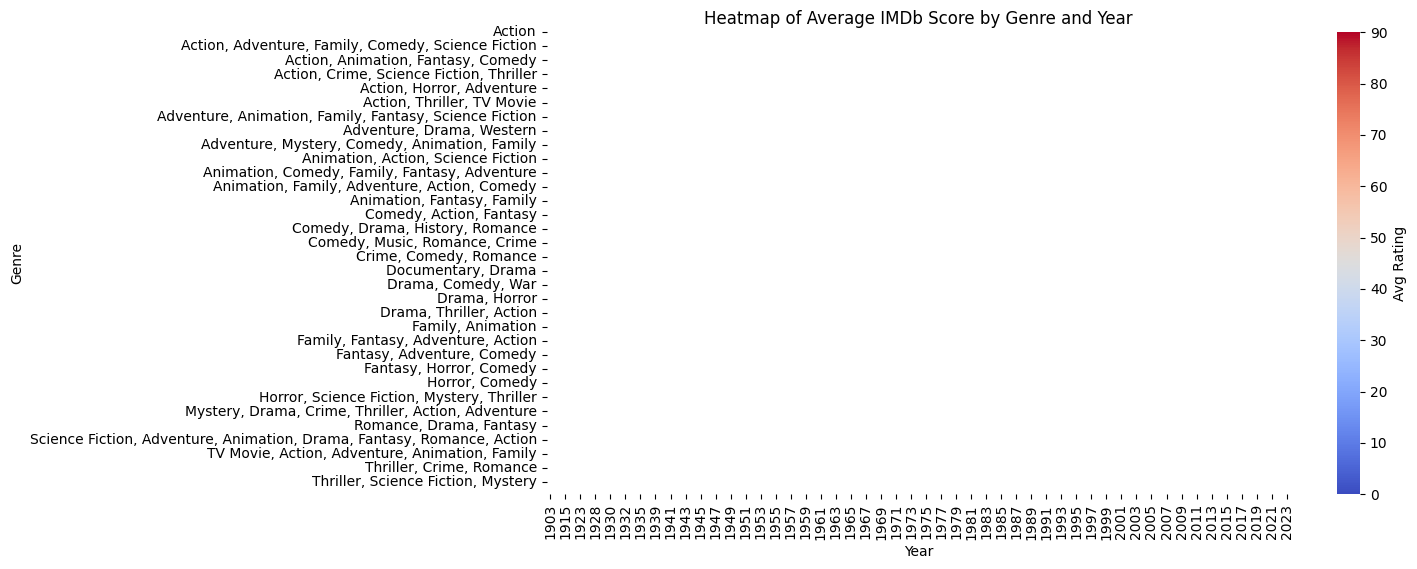

In [75]:
#Are there specific genres or release years with higher-rated movies? Group by genre and year, then analyze the average rating.


# Convert 'date_x' column to datetime and extract the release year
df['Year'] = pd.to_datetime(df['date_x'], errors='coerce').dt.year

# Drop rows with missing values in 'Year' or 'genre'
df_clean = df.dropna(subset=['Year', 'genre', 'score'])

# Group by 'Year' and 'genre', then calculate the average rating
genre_year_avg_rating = df_clean.groupby(['Year', 'genre'])['score'].mean().reset_index()

# Sort by average score for better readability
genre_year_avg_rating = genre_year_avg_rating.sort_values(by=['Year', 'score'], ascending=[True, False])

# Get the top-rated genre for each year
top_genre_by_year = genre_year_avg_rating.loc[genre_year_avg_rating.groupby('Year')['score'].idxmax()]

# Display the top-rated genre for each year
print(top_genre_by_year.head(10))  # Display first 10 years

# Visualization: Heatmap for top genres over years
plt.figure(figsize=(12, 6))
pivot_table = genre_year_avg_rating.pivot(index="genre", columns="Year", values="score")
sns.heatmap(pivot_table, cmap="coolwarm", annot=False, linewidths=0.5, cbar_kws={'label': 'Avg Rating'})
plt.title("Heatmap of Average IMDb Score by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()


In [ ]:
Movie production has significantly increased over time, with the highest releases in recent years.
 Higher-budget movies tend to earn more revenue, but budget does not always influence ratings.
 Some low-budget movies are highly successful, proving that storytelling is key.
 Older movies generally have higher ratings, possibly due to selective voting and nostalgia.
 Genres like Drama, War, and Documentary tend to have higher ratings, while Comedy and Horror have more variation.

In [ ]:
Rest of the insights will mention in readme file. 